In [1]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(url, header = None, sep = '\s+')
df.columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'Origin', 'Car_name']
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [2]:
df["Horsepower"] = df["Horsepower"].apply(lambda x: x.replace('?', '96'))

In [5]:
df.info()
df["Horsepower"] = pd.to_numeric(df["Horsepower"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model_year      398 non-null int64
Origin          398 non-null int64
Car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model_year      398 non-null int64
Origin          398 non-null int64
Car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
df.isna().any()

MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model_year      False
Origin          False
Car_name        False
dtype: bool

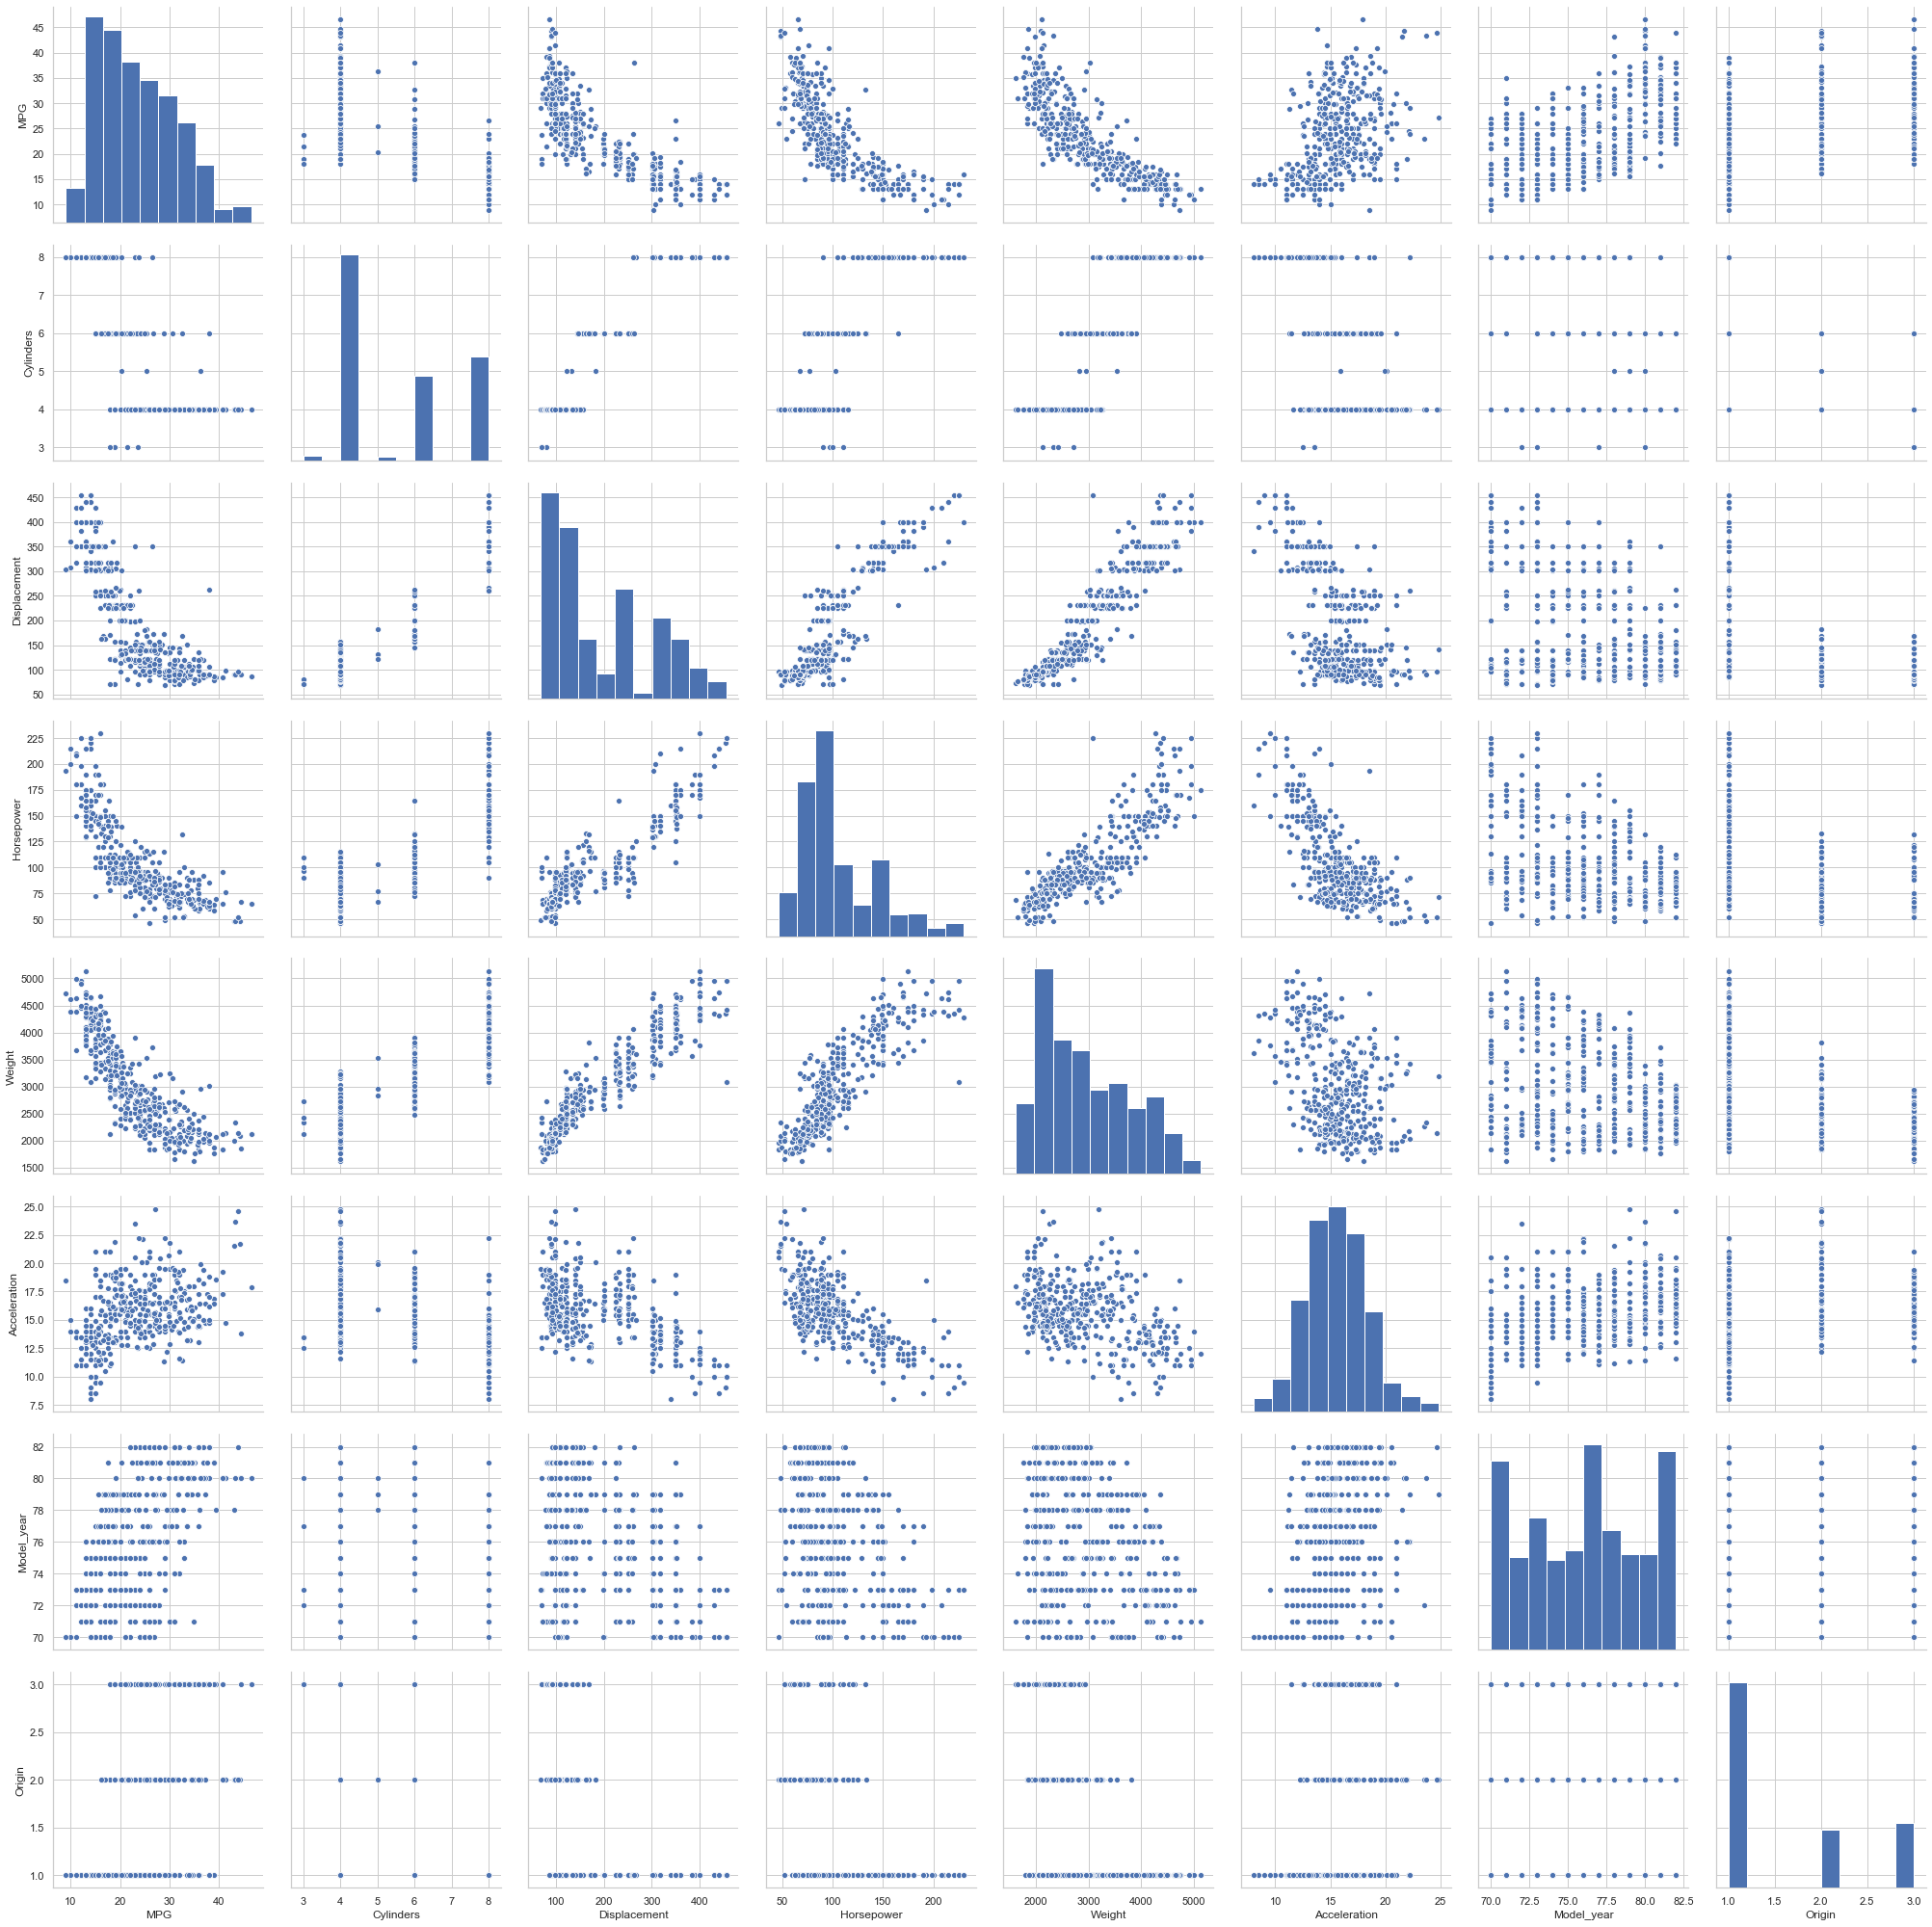

In [55]:
#CORRELATION
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style= 'whitegrid', context = 'notebook')
cols = [ 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'Origin', 'Car_name' ]
sns.pairplot(df[cols] , height = 3.5)
plt.show() 

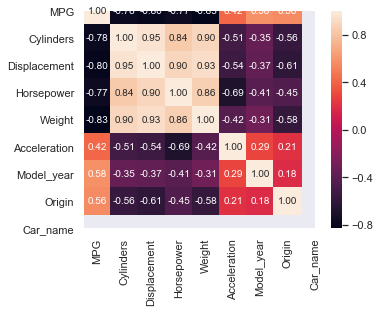

In [56]:
#Heat map for correlation. We did it for search a good columns for futher regression model
import numpy as np
sns.set(font_scale= 1) 
hm = sns.heatmap(df[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10} , yticklabels=cols, xticklabels=cols) 
plt.show() 

In [13]:
#Regression for MPG (1 parameter only)
import numpy as np
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 0)
X = train_df[['Weight']].values.astype(int)
y = train_df['MPG'].values.astype(int)

In [59]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

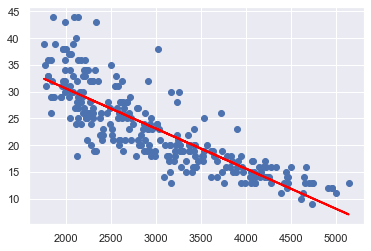

In [60]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2);

In [3]:
#Regression for multiple parameters
from sklearn.model_selection import train_test_split
Y = df.MPG.astype(int)
X = df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'Origin']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [16]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(activation='relu', solver='adam', random_state=0,hidden_layer_sizes=(1024,512,256))
regr.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1024, 512, 256), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
y_pred_test = regr.predict(x_test)
y_pred_train = regr.predict(x_train)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)))

MSE train: 23.312, test: 24.164
R^2 train: 0.603, test: 0.614


In [11]:
df.to_csv('lab2.csv', index=False)

In [62]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [63]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8158354023676455
0.813970275623469


In [64]:
test_pred_y = model.predict(x_test)
train_pred_y = model.predict(x_train)
from sklearn import metrics 

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, train_pred_y),
        mean_squared_error(y_test, test_pred_y)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, train_pred_y),
        r2_score(y_test, test_pred_y)))

MSE train: 10.823, test: 11.634
R^2 train: 0.816, test: 0.814


In [35]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)

x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_poly_pred_test = model.predict(x_poly_test)
y_poly_pred_train = model.predict(x_poly_train)

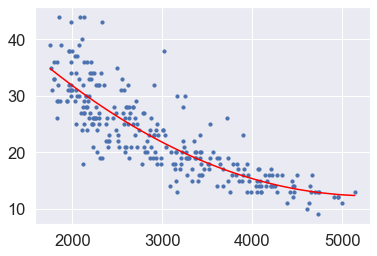

In [36]:
X = train_df[['Weight']].values.astype(int)
y = train_df['MPG'].values.astype(int)
x_poly = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(X, y, s=10)
import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='red')
plt.show()
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

In [37]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_poly_pred_train),
        mean_squared_error(y_test, y_poly_pred_test)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_poly_pred_train),
        r2_score(y_test, y_poly_pred_test)))

MSE train: 6.301, test: 8.254
R^2 train: 0.893, test: 0.868


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

Y = df.MPG.astype(int)
X = df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'Origin']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(x_train, y_train)
print(regr.feature_importances_)

[0.05865922 0.38251026 0.18780686 0.23943066 0.02708503 0.09739778
 0.00711018]


C:\Users\Public\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
y_pred_test = regr.predict(x_test)
y_pred_train = regr.predict(x_train)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)))

MSE train: 1.421, test: 7.536
R^2 train: 0.976, test: 0.879
